In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Game import *

Version:  0.2.35


In [3]:
def initial_state():
    state=Board(3,3)
    state.pieces=[".","X","O"]
    return state

def show_state(state):
    print(state)
    
def valid_moves(state,player):
    # run through all the spots
    # if it is empty, then append that
    # location to the possible moves
    
    moves=[]
    for location in range(9):
        if state[location]==0:
            moves.append(location)
            
    return moves  

def update_state(state,player,move):
    new_state=state
    
    new_state[move]=player
    return new_state    
    
def win_status(state,player):
    # the state is *after* the move for the player

    #  0  1  2 
    #  3  4  5 
    #  6  7  8   
    
    for start,middle,end in [
        [0,1,2],[3,4,5],[6,7,8],
        [0,3,6],[1,4,7],[2,5,8],
        [0,4,8],[2,4,6],
                ]:
        
        if state[start]==player and state[middle]==player and state[end]==player:
            return "win"
        
    if player==1:
        other_player=2
    else:
        other_player=1
    
    if not valid_moves(state,other_player):
        return "stalemate"
    

In [4]:
def human_move(state,player):
    
    state.show_locations()
    print("Player",player)
    move=int(input("which square to move?"))
    return move

human_agent=Agent(human_move) 

def random_move(state,player):
    
    move=random.choice(valid_moves(state,player))
    return move


random_agent=Agent(random_move)

In [5]:
from Game.minimax import *
def minimax_move(state,player):

    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [6]:
Q1=LoadTable("../Sprint #2 - Learning and Simulation/2021-10-18 TTT Q1.json")
Q2=LoadTable("../Sprint #2 - Learning and Simulation/2021-10-18 TTT Q2.json")

In [7]:
from RobotSim373 import *

Version:  0.0.49


In [8]:
def build(robot,x=1,y=2,name=None):
    R=.5
    r=R/5
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center {round(x)} {round(y)}')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d {round(x)} {round(y)}' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)
    
    
      


In [9]:
def nothing(t,robot):
    return True

def monitor(t,robot):
    robot.message=t   
    
def turn_green(t,robot):
    robot.color='g'
    return True

def turn_blue(t,robot):
    robot.color='cyan'
    return True

def turn_orange(t,robot):
    robot.color='orange'
    return True

def turn_red(t,robot):
    robot.color='r'
    return True

def turn_purple(t,robot):
    robot.color='purple'
    return True    


def take_picture(t,robot):
    robot.take_picture('images/ttt_robot.jpeg')
    return True    

## Set up board, size of pieces, location of pieces

In [10]:
state_machine=StateMachine(
    (take_picture,"_end_simulation"),
)


def pieceX(env,x,y):
    
    boxes=[Box(env,x+.5,y+.5,width=1,height=.2,angle=45,color='blue'),
        Box(env,x-.5,y-.5,width=1,height=.2,angle=45,color='blue'),
        Box(env,x+.5,y-.5,width=1,height=.2,angle=135,color='blue'),
        Box(env,x-.5,y+.5,width=1,height=.2,angle=135,color='blue')
          ]
    
    connect(boxes[0],boxes[1:],"weld")
    
def pieceO(env,x,y):
    
    Disk(env,x=x,y=y,radius=1,color='red')
    

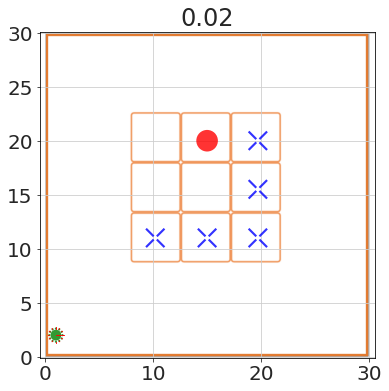

In [11]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

pieceX(env,10.2,11)
pieceX(env,15,11)
pieceX(env,19.7,11)
pieceX(env,19.7,15.5)
pieceX(env,19.7,20)

pieceO(env,15,20)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


## Set up sensor array to detect pieces

In [12]:
def build(robot,name=None):
    R=.5
    r=R/5
    
    
    x=12.5
    y=18
    
    robot.centers={}
    robot.disks={}
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center NW')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d NW' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=17.2
    y=18
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center NE')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d NE' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=17.2
    y=13.3
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center SE')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d SE' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=12.5
    y=13.3
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center SW')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d SW' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.angles=list(range(0,360,30))
    
     
        

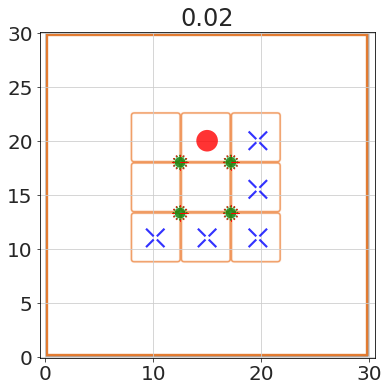

In [13]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

pieceX(env,10.2,11)
pieceX(env,15,11)
pieceX(env,19.7,11)
pieceX(env,19.7,15.5)
pieceX(env,19.7,20)

pieceO(env,15,20)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


## Read the distances in upper right square, as an example

In [14]:
def read_NE_distance(t,act):
    
    #angle in range(0,360,30):

    robot.distances=[]
    for angle in range(0,90,30):
        name=f'disk {angle} NE'
        robot.distances.append(robot[name].read_distance())
        
    return True
        
    
    
    
    

In [15]:
state_machine=StateMachine(
    (read_NE_distance,"_end_simulation"),
)


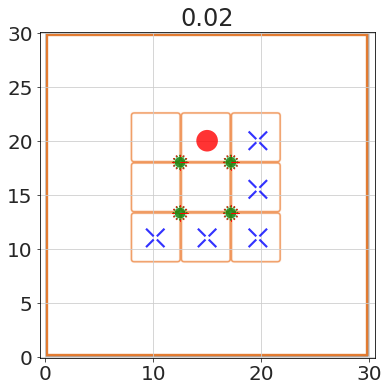

In [16]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

pieceX(env,10.2,11)
pieceX(env,15,11)
pieceX(env,19.7,11)
pieceX(env,19.7,15.5)
pieceX(env,19.7,20)

pieceO(env,15,20)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


In [17]:
robot.distances

[12.190000534057617, 2.5807002927552176, 2.5807026427053543]

## now read the middle top square too

In [18]:
def read_distances(t,act):
    
    #angle in range(0,360,30):

    robot.distances=[]
    
    distances=[]
    for angle in range(0,90,30):
        name=f'disk {angle} NE'
        distances.append(robot[name].read_distance())

    robot.distances.append(distances)

    
    distances=[]
    for angle in range(90,180,30):
        name=f'disk {angle} NE'
        distances.append(robot[name].read_distance())

    robot.distances.append(distances)
    
        
    return True
        
    
    
    
    

In [19]:
state_machine=StateMachine(
    (read_distances,"_end_simulation"),
)


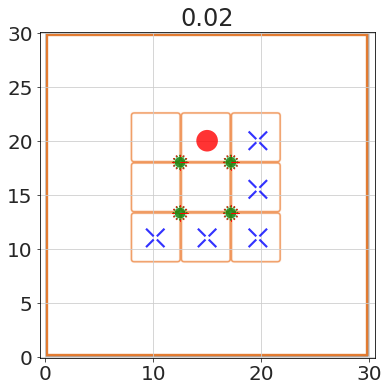

In [20]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

pieceX(env,10.2,11)
pieceX(env,15,11)
pieceX(env,19.7,11)
pieceX(env,19.7,15.5)
pieceX(env,19.7,20)

pieceO(env,15,20)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


In [21]:
robot.distances

[[12.190000534057617, 2.5807002927552176, 2.5807026427053543],
 [11.389999389658659, 1.797179370049803, 1.5203315129923245]]

looks like I might be able to distinguish X from O with distances between 0-2 for O, 2-3 for X and >3 for empty

## do a read state

In [22]:
def read_state(t,act):
    
    #angle in range(0,360,30):

    state=Board(3,3)
    
    for location in range(9):
        
        if location==0:
            sensor='NW'
            angles=range(90,180,30)
        elif location==1:
            sensor='NE'
            angles=range(90,180,30)
        elif location==2:
            sensor='NE'
            angles=range(0,90,30)
        elif location==3:
            sensor='NW'
            angles=range(180,270,30)
        elif location==4:
            sensor='NW'
            angles=range(270,360,30)
        elif location==5:
            sensor='NW'
            angles=range(270,360,30)
        elif location==6:
            sensor='SW'
            angles=range(180,270,30)
        elif location==7:
            sensor='SW'
            angles=range(270,360,30)
        elif location==8:
            sensor='SE'
            angles=range(270,360,30)
        else:
            raise ValueError("You can't get there from here.")
    
        distances=[]
        for angle in angles:
            name=f'disk {angle} {sensor}'
            distances.append(robot[name].read_distance())

        piece=0
        # check for X
        for d in distances:
            if d>=2 and d<=3:
                piece=1

        if not piece:  #still haven't found which piece
            # check for O
            for d in distances:
                if d<2:
                    piece=2
        
        state[location]=piece
        
    robot.state=state
    
    return True
        
    
    
state_machine=StateMachine(
    (read_state,"_end_simulation"),
)
    
    

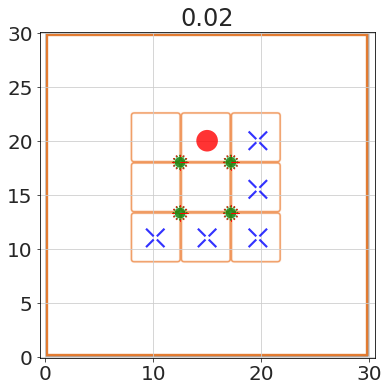

In [23]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

pieceX(env,10.2,11)
pieceX(env,15,11)
pieceX(env,19.7,11)
pieceX(env,19.7,15.5)
pieceX(env,19.7,20)

pieceO(env,15,20)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


In [24]:
robot.state

 0  2  1 
 0  0  0 
 1  1  1 

something is wrong with position 5

In [25]:
def read_state(t,robot):
    
    #angle in range(0,360,30):

    state=Board(3,3)
    
    for location in range(9):
        
        if location==0:
            sensor='NW'
            angles=range(90,180,30)
        elif location==1:
            sensor='NE'
            angles=range(90,180,30)
        elif location==2:
            sensor='NE'
            angles=range(0,90,30)
        elif location==3:
            sensor='NW'
            angles=range(180,270,30)
        elif location==4:
            sensor='NW'
            angles=range(270,360,30)
        elif location==5:
            sensor='NW'   #<========== should be NE!
            angles=range(270,360,30)
        elif location==6:
            sensor='SW'
            angles=range(180,270,30)
        elif location==7:
            sensor='SW'
            angles=range(270,360,30)
        elif location==8:
            sensor='SE'
            angles=range(270,360,30)
        else:
            raise ValueError("You can't get there from here.")
    
        distances=[]
        for angle in angles:
            name=f'disk {angle} {sensor}'
            distances.append(robot[name].read_distance())

        piece=0
        # check for X
        for d in distances:
            if d>=2 and d<=3:
                piece=1

        if not piece:  #still haven't found which piece
            # check for O
            for d in distances:
                if d<2:
                    piece=2
        
        if location==5:
            print(distances)
            raise ValueError # make it crash here
        state[location]=piece
        
    robot.state=state
    
    return True
        
    
state_machine=StateMachine(
    (read_state,"_end_simulation"),
)
    
        
    
    

In [26]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

pieceX(env,10.2,11)
pieceX(env,15,11)
pieceX(env,19.7,11)
pieceX(env,19.7,15.5)
pieceX(env,19.7,20)

pieceO(env,15,20)


run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


[17.389999389784, 20.174658701356464, 19.59720652351881]


ValueError: 

## now with a fixed read state

In [27]:
def read_state(t,robot):
    
    #angle in range(0,360,30):

    state=Board(3,3)
    
    robot.distances=[]  # for debugging
    for location in range(9):
        
        if location==0:
            sensor='NW'
            angles=range(90,180,30)
        elif location==1:
            sensor='NE'
            angles=range(90,180,30)
        elif location==2:
            sensor='NE'
            angles=range(0,90,30)
        elif location==3:
            sensor='NW'
            angles=range(180,270,30)
        elif location==4:
            sensor='NW'
            angles=range(270,360,30)
        elif location==5:
            sensor='NE' 
            angles=range(270,360,30)
        elif location==6:
            sensor='SW'
            angles=range(180,270,30)
        elif location==7:
            sensor='SW'
            angles=range(270,360,30)
        elif location==8:
            sensor='SE'
            angles=range(270,360,30)
        else:
            raise ValueError("You can't get there from here.")
    
        distances=[]
        for angle in angles:
            name=f'disk {angle} {sensor}'
            distances.append(robot[name].read_distance())

        piece=0
        # check for X
        for d in distances:
            if d>=2 and d<=3:  # any of them between 2 and 3
                piece=1

        if not piece:  #still haven't found which piece
            # check for O
            for d in distances:
                if d<2:
                    piece=2
        
        state[location]=piece
        robot.distances.append(distances)
        
    robot.state=state
    
    return True
        
    
state_machine=StateMachine(
    (read_state,"_end_simulation"),
)
    
        
    
    

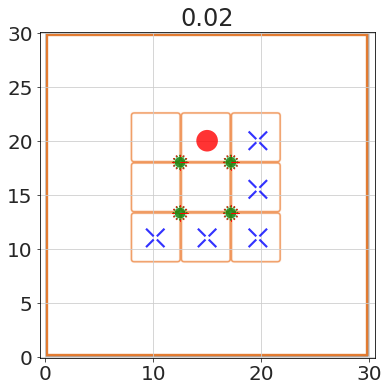

In [28]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

pieceX(env,10.2,11)
pieceX(env,15,11)
pieceX(env,19.7,11)
pieceX(env,19.7,15.5)
pieceX(env,19.7,20)

pieceO(env,15,20)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


In [29]:
robot.state

 0  2  1 
 0  0  1 
 1  1  1 

## works for this case, but can it work for other states?  try randomly generating boards!

In [30]:
state=Board(3,3)
for i in range(9):
    state[i]=random.choice([0,1,2])
state

 1  1  1 
 1  2  2 
 1  0  0 

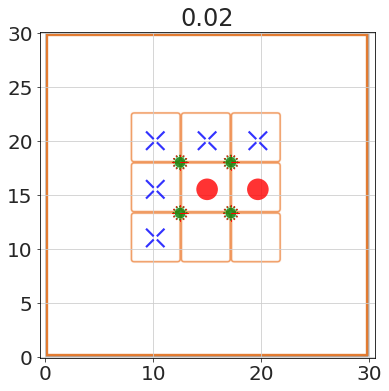

 1  1  1 
 1  2  2 
 1  0  0 

 1  1  1 
 1  1  1 
 1  0  0 



In [31]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

x=[10.2,15,19.7,10.2,15,19.7,10.2,15,19.7,]
y=[20,20,20,15.5,15.5,15.5,11,11,11]



for i in range(9):
    if state[i]==1:
        pieceX(env,x[i],y[i])
    elif state[i]==2:
        pieceO(env,x[i],y[i])
    else:
        pass

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=.1,  # make this larger for a faster display
       )

print(state)
print(robot.state)

ooops!  what's going on?  def getting the blank squares, but making errors.  

- maybe the distance is more like 2.1 rather than 2.
- maybe make the pieceO (player 2) bigger to make it easier to distinguish between

In [32]:
robot.distances

[[11.389999389659977, 2.4342890897682405, 2.4342920100898007],
 [11.389999389658659, 2.361085140086037, 2.3610862808298774],
 [12.190000534057617, 2.5807002927552176, 2.5807026427053543],
 [11.890000343366966, 2.800314304702802, 2.8003187148308357],
 [17.389999389784, 2.401731120536427, 2.4017785804957184],
 [17.389999389784, 2.401737157420037, 2.4017777545874623],
 [11.890000343366966, 2.653904148914782, 2.6539095127255723],
 [12.68999862681348, 14.747554392602265, 19.597206761935464],
 [12.68999862681348, 14.747553438920862, 14.170128696342282]]

In [33]:
def pieceX(env,x,y):
    
    boxes=[Box(env,x+.5,y+.5,width=1,height=.2,angle=45,color='blue'),
        Box(env,x-.5,y-.5,width=1,height=.2,angle=45,color='blue'),
        Box(env,x+.5,y-.5,width=1,height=.2,angle=135,color='blue'),
        Box(env,x-.5,y+.5,width=1,height=.2,angle=135,color='blue')
          ]
    
    connect(boxes[0],boxes[1:],"weld")
    
def pieceO(env,x,y):
    
    Disk(env,x=x,y=y,radius=1.5,color='red')
 

In [34]:
def read_state(t,robot):
    
    #angle in range(0,360,30):

    state=Board(3,3)
    
    robot.distances=[]  # for debugging
    for location in range(9):
        
        if location==0:
            sensor='NW'
            angles=range(90,180,30)
        elif location==1:
            sensor='NE'
            angles=range(90,180,30)
        elif location==2:
            sensor='NE'
            angles=range(0,90,30)
        elif location==3:
            sensor='NW'
            angles=range(180,270,30)
        elif location==4:
            sensor='NW'
            angles=range(270,360,30)
        elif location==5:
            sensor='NE' 
            angles=range(270,360,30)
        elif location==6:
            sensor='SW'
            angles=range(180,270,30)
        elif location==7:
            sensor='SW'
            angles=range(270,360,30)
        elif location==8:
            sensor='SE'
            angles=range(270,360,30)
        else:
            raise ValueError("You can't get there from here.")
    
        distances=[]
        for angle in angles:
            name=f'disk {angle} {sensor}'
            distances.append(robot[name].read_distance())

        piece=0
        # check for X
        for d in distances:
            if d>=2.1 and d<=3:  # any of them between 2 and 3
                piece=1

        if not piece:  #still haven't found which piece
            # check for O
            for d in distances:
                if d<2.1:
                    piece=2
        
        state[location]=piece
        robot.distances.append(distances)
        
    robot.state=state
    
    return True
        
    
state_machine=StateMachine(
    (read_state,"_end_simulation"),
)
    
        
    
    

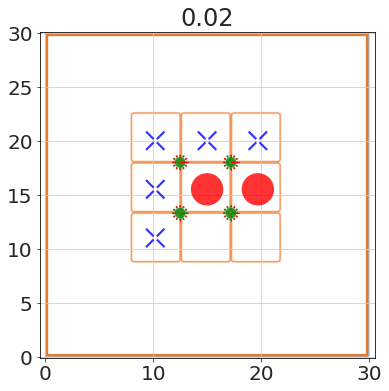

 1  1  1 
 1  2  2 
 1  0  0 

 1  1  1 
 1  2  2 
 1  0  0 



In [35]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

x=[10.2,15,19.7,10.2,15,19.7,10.2,15,19.7,]
y=[20,20,20,15.5,15.5,15.5,11,11,11]



for i in range(9):
    if state[i]==1:
        pieceX(env,x[i],y[i])
    elif state[i]==2:
        pieceO(env,x[i],y[i])
    else:
        pass

# for x in [8,16,24]:
#     for y in [7,15,22]:
#         Box(env,x=x,y=y,density=0.001)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=.1,  # make this larger for a faster display
       )

print(state)
print(robot.state)

In [36]:
robot.distances

[[11.389999389659977, 2.4342890897682405, 2.4342920100898007],
 [11.389999389658659, 2.361085140086037, 2.3610862808298774],
 [12.190000534057617, 2.5807002927552176, 2.5807026427053543],
 [11.890000343366966, 2.800314304702802, 2.8003187148308357],
 [17.389999389784, 1.6165047980239375, 1.616515849647983],
 [17.389999389784, 1.616507403513596, 1.616516803314297],
 [11.890000343366966, 2.653904148914782, 2.6539095127255723],
 [12.68999862681348, 14.747554392602265, 19.597206761935464],
 [12.68999862681348, 14.747553438920862, 14.170128696342282]]

In [37]:
state==robot.state

True

### automate this process

In [38]:
from tqdm import tqdm

In [39]:
for i in tqdm(range(100)):

    # generate random board
    state=Board(3,3)
    for i in range(9):
        state[i]=random.choice([0,1,2])


    # build robot and environment -- but turn off the display
    
    env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
    robot=Robot(env)
    build(robot)
    robot.controller=Controller(state_machine)
    robot.controller.monitor=monitor

    x=[10.2,15,19.7,10.2,15,19.7,10.2,15,19.7,]
    y=[20,20,20,15.5,15.5,15.5,11,11,11]



    for i in range(9):
        if state[i]==1:
            pieceX(env,x[i],y[i])
        elif state[i]==2:
            pieceO(env,x[i],y[i])
        else:
            pass

    run_sim(env,robot.controller, 
            figure_width=6,
           total_time=100,
           dt_display=None, # no plotting!
           )

    if not state==robot.state:
        print(state,robot.state)
        raise ValueError


100%|██████████| 100/100 [00:04<00:00, 22.32it/s]


## Now that I have a working read state, let's see if I can get a make move working

### The Plan

<img src="images/TTT Plan.png" width=300>

### first step - get the moving part of the robot, and the pieces where I need them

In [40]:
def build(robot,name=None):
    R=.5
    r=R/5
    
    
    x=12.5
    y=18
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center NW')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d NW' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=17.2
    y=18
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center NE')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d NE' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=17.2
    y=13.3
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center SE')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d SE' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=12.5
    y=13.3
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center SW')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d SW' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    # The moving part of the robot here
    
    ##  home position
    robot.home_x=3
    robot.home_y=3

    x=robot.home_x
    y=robot.home_y
    
    angle=0
    center=Disk(robot,x,y,radius=R,angle=angle,name=f'center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    
    robot.state=None
        

In [41]:
def place_pieces(env):
    x=[10.2,15,19.7,10.2,15,19.7,10.2,15,19.7,]
    y=[20,20,20,15.5,15.5,15.5,11,11,11]



    offset=4
    for i in range(9):
        if i in [0,1,2]:
            pieceX(env,x[i],y[i]+offset)
        elif i in [6,7,8]:
            pieceX(env,x[i],y[i]-offset)
        elif i==3:
            pieceX(env,x[i]-offset,y[i])
        elif i==5:
            pieceX(env,x[i]+offset,y[i])
        elif i==4: # not sure how to deal with the center piece, but I'll solve it later
            pass
        else:
            raise ValueError("You can't get there from here.")


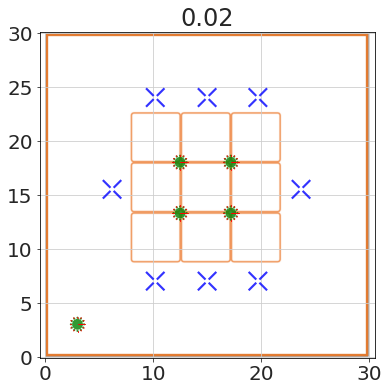

 0  0  0 
 0  0  0 
 0  0  0 



In [42]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=.1,  # make this larger for a faster display
       )


print(robot.state)

the idea here is that, say, to move a piece to game (board) location 0 

1. I want to move north to about (3,27)
2. then east to (10,27)
3. then south to about (10,20) to push the piece into position.  
4. Then reverse those steps to move back home.

In [43]:
def north(t,robot):
    robot['disk 90'].F=10
    return True

def south(t,robot):
    robot['disk 90'].F=-10
    return True
    
def east(t,robot):
    robot['disk 0'].F=10
    return True

def west(t,robot):
    robot['disk 0'].F=-10
    return True

def off(t,robot):
    for disk in robot.disks:
        disk.F=0
    return True

def until_xy(x,y):
    
    def _until_xy(t,act):
        try:
            xx=robot.original_x
        except AttributeError: 
            robot.original_x=robot['center'].x
            robot.original_y=robot['center'].y
            robot.original_distance2=(x-robot.original_x)**2+(y-robot.original_y)**2
            robot.last_distance2=robot.original_distance2
            
        robot.current_distance2=(x-robot['center'].x)**2+(y-robot['center'].y)**2

        if robot.current_distance2<1 and robot.current_distance2>robot.last_distance2:  # stop when getting farther away
            del robot.original_x, robot.original_y,robot.last_distance2
            return True
        
        robot.last_distance2=robot.current_distance2

        
    return _until_xy
            
        
        
        

move0=StateMachine(
    ([north,until_xy(3,27),off,turn_purple],"_end_simulation"),
)


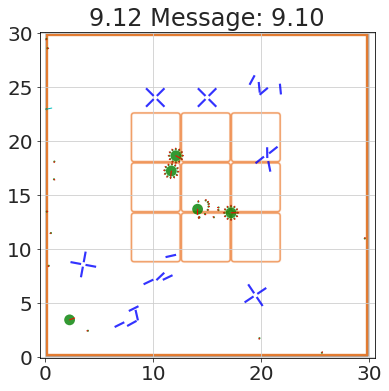

AssertionError: den > 0.0f

In [44]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(move0)
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

ok, that was a big mess-up.  I think I forgot a weld in the build.  

nope - I welded the little disks from the moving robot to the center of one of the pieces!  oops!

while we're at it, let's monitor the distance to the target location.

In [ ]:
def monitor(t,robot):
    try:
        robot.message=t,robot.current_distance2,robot.controller.current_state
    except AttributeError: 
        robot.message=t,None,robot.controller.current_state    


In [45]:
def build(robot,name=None):
    R=.5
    r=R/5
    
    
    x=12.5
    y=18
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center NW')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d NW' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=17.2
    y=18
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center NE')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d NE' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=17.2
    y=13.3
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center SE')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d SE' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    #============
    
    x=12.5
    y=13.3
    
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name=f'center SW')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d SW' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

   
    ##  home position
    robot.home_x=3
    robot.home_y=3

    x=robot.home_x
    y=robot.home_y
    
    angle=0
    center=Disk(robot,x,y,radius=R,angle=angle,name=f'center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    
    robot.state=None
        

## Debugging until_y and until_x

In [46]:
move0=StateMachine(
    ([north,until_y(27),off,turn_purple],"_end_simulation"),
)

move0=StateMachine(
    ([east,until_x(10),off,turn_purple],"_end_simulation"),
)

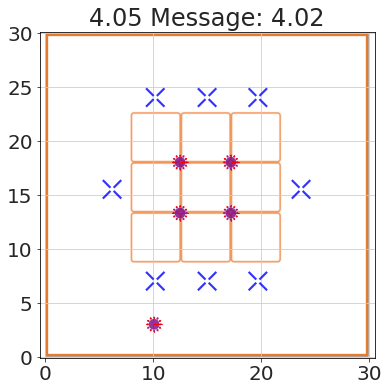

None


In [47]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(move0)
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

### add one more step to the move

In [64]:
        

move0=StateMachine(
    ([north,until_xy(3,27),turn_purple,off,east,until_xy(10,27),turn_red],"_end_simulation"),
)


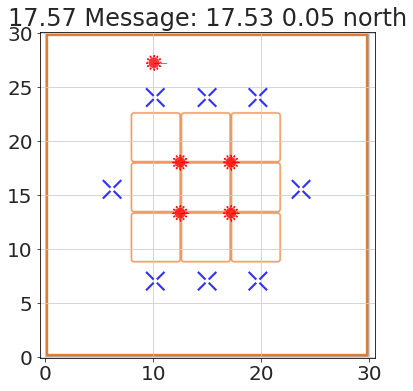

None


In [65]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(move0)
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

### adding another step

In [66]:
move0=StateMachine(
    ([north,until_xy(3,27),turn_purple,off],"east"),
    ([east,until_xy(10,27),turn_red,off],"south"),
    ([south,until_xy(10,21.5),turn_purple,off],"_end_simulation"),
)


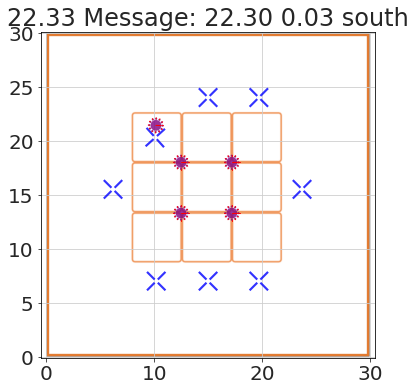

None


In [67]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(move0)
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

### Now in reverse

The reverse statemachine has to be defined first, because it's called by the forward statemachine

In [68]:
move0_reverse=StateMachine(
    ([north,until_xy(10,27),turn_purple,off],"west"),
    ([west,until_xy(3,27),turn_red,off],"south"),
    ([south,until_xy(3,3),turn_purple,off],"_end_simulation"),
)

move0_forward=StateMachine(
    ([north,until_xy(3,27),turn_purple,off],"east"),
    ([east,until_xy(10,27),turn_red,off],"south"),
    ([south,until_xy(10,21.5),turn_purple,off],move0_reverse),
)



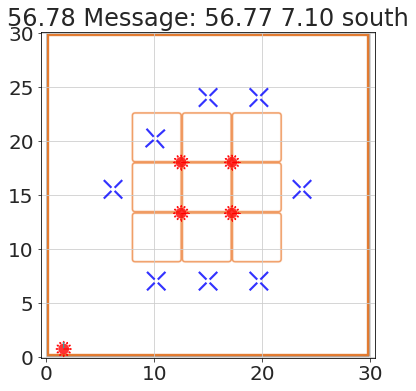

None


In [69]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(move0_forward)
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

density of the pieces too high, some reason not going north

### fix these issues

In [70]:
def pieceX(env,x,y):
    
    boxes=[Box(env,x+.5,y+.5,width=1,height=.2,angle=45,color='blue',density=0.001),
        Box(env,x-.5,y-.5,width=1,height=.2,angle=45,color='blue',density=0.001),
        Box(env,x+.5,y-.5,width=1,height=.2,angle=135,color='blue',density=0.001),
        Box(env,x-.5,y+.5,width=1,height=.2,angle=135,color='blue',density=0.001)
          ]
    
    connect(boxes[0],boxes[1:],"weld")
    
def pieceO(env,x,y):
    
    Disk(env,x=x,y=y,radius=1.5,color='red',density=0.001)
 

In [71]:
move0_reverse=StateMachine(
    ([north,until_xy(10,27),turn_purple,off],"west"),
    ([west,until_xy(3,27),turn_red,off],"south"),
    ([south,until_xy(3,3),turn_orange,off],"_end_simulation"),
)

move0_forward=StateMachine(
    ([north,until_xy(3,27),turn_purple,off],"east"),
    ([east,until_xy(10,27),turn_red,off],"south"),
    ([south,until_xy(10,21.5),turn_orange,off],move0_reverse),
)



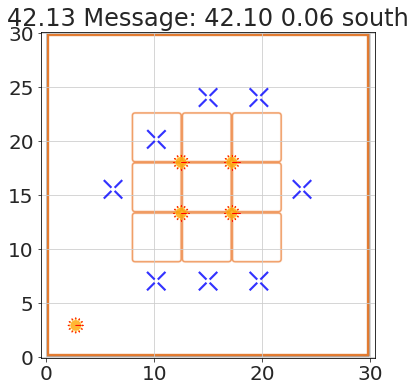

None


In [72]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(move0_forward)
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

## Now extend to all the other moves

I could copy/paste this, but I like to do loops.  I am still not sure how I'm going to handle the middle piece

In [74]:
moves=[  
    [(3,27),(10,27),(10,21.5)],  # for move 0
    [(3,27),(14.7,27),(14.7,21.5)],  # for move 1
    [(3,27),(19.5,27),(19.5,21.5)],  # for move 2
]

forward_state_machines=[]
reverse_state_machines=[]

# have to do the reverse ones first, because the forward ones call them

for move in range(3):

    coords=moves[move]
    x0,y0=3,3 # home
    x1,y1=coords[0]
    x2,y2=coords[1]
    x3,y3=coords[2]

    move_reverse=StateMachine(
        ([north,until_xy(x2,y2),turn_purple,off],"west"),
        ([west,until_xy(x1,y2),turn_red,off],"south"),
        ([south,until_xy(x0,x0),turn_orange,off],"_end_simulation"),
    )    

    move_forward=StateMachine(
        ([north,until_xy(x1,y1),turn_purple,off],"east"),
        ([east,until_xy(x2,y2),turn_red,off],"south"),
        ([south,until_xy(x3,y3),turn_orange,off],move_reverse),
    )

    forward_state_machines.append(move_forward)
    reverse_state_machines.append(move_reverse)


move=3
coords=[(3,15.3),(9,15.3)]
x0,y0=3,3 # home
x1,y1=coords[0]
x2,y2=coords[1]

move_reverse=StateMachine(
    ([west,until_xy(x1,y2),turn_red,off],"south"),
    ([south,until_xy(x0,x0),turn_orange,off],"_end_simulation"),
)    

move_forward=StateMachine(
    ([north,until_xy(x1,y1),turn_purple,off],"east"),
    ([east,until_xy(x2,y2),turn_red,off],move_reverse),
)

forward_state_machines.append(move_forward)
reverse_state_machines.append(move_reverse)

# move 4 is an exception
move=4
coords=[(3,15.3),(13.2,15.3)]
x0,y0=3,3 # home
x1,y1=coords[0]
x2,y2=coords[1]

move_reverse=StateMachine(
    ([west,until_xy(x1,y1),turn_red,off],"south"),
    ([south,until_xy(x0,x0),turn_orange,off],"_end_simulation"),
)    

move_forward=StateMachine(
    ([north,until_xy(x1,y1),turn_purple,off],"east"),
    ([east,until_xy(x2,y2),turn_red,off],move_reverse),
)

forward_state_machines.append(move_forward)
reverse_state_machines.append(move_reverse)


def make_block_at_4(t,robot):
    pieceX(robot.env,x=15,y=15.5)
    return True

appear_at_4=StateMachine(
    (make_block_at_4,"_end_simulation"),
)


move=5
coords=[(27,3),(27,15.3),(21,15.3)]
x0,y0=3,3 # home
x1,y1=coords[0]
x2,y2=coords[1]
x3,y3=coords[2]

move_reverse=StateMachine(
    ([east,until_xy(x2,y2),turn_red,off],"south"),
    ([south,until_xy(x1,y1),turn_blue,off],"west"),
    ([west,until_xy(x0,y0),turn_orange,off],"_end_simulation"),
)    

move_forward=StateMachine(
    ([east,until_xy(x1,y1),turn_purple,off],"north"),
    ([north,until_xy(x2,y2),turn_red,off],"west"),
    ([west,until_xy(x3,y3),turn_orange,off],move_reverse),
)

forward_state_machines.append(move_forward)
reverse_state_machines.append(move_reverse)


moves=[  [],[],[],[],[],[],
    [(10,3),(10,9.7)],  # for move 6
    [(14.7,3),(14.7,9.7)],  # for move 7
    [(19.5,3),(19.5,9.7)],  # for move 8
]

for move in range(6,9):

    coords=moves[move]
    x0,y0=3,3 # home
    x1,y1=coords[0]
    x2,y2=coords[1]

    move_reverse=StateMachine(
        ([south,until_xy(x1,y1),turn_purple,off],"west"),
        ([west,until_xy(x0,x0),turn_orange,off],"_end_simulation"),
    )    

    move_forward=StateMachine(
        ([east,until_xy(x1,y1),turn_purple,off],"north"),
        ([north,until_xy(x2,y2),turn_red,off],move_reverse),
    )

    forward_state_machines.append(move_forward)
    reverse_state_machines.append(move_reverse)




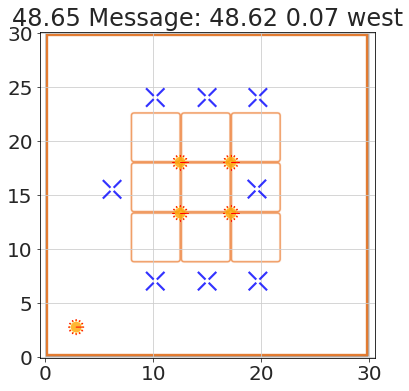

None


In [76]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)

move=5
robot.controller=Controller(forward_state_machines[move])
robot.controller.monitor=monitor

place_pieces(env)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

## Now that make move is working, let's see if we can put it together to play the full game

the recipe is:

In the robot simulator:
- read state
- from the state, get a move (from one of the game agents)
- make the move



Outside the robot simulator:
- update the state
- check for a win
    - win, lose, stalemate - end the game
    - otherwise continue the game
- get a human move
- update the state
- check for a win
    - win, lose, stalemate - end the game
    - otherwise continue the game


for debugging, 

- we'll want to start with some kind of random state
- change the monitor a bit
- make the move functions not end the simulation!


In [77]:
def get_move(t,robot):
    state=robot.state
    # assuming my robot is player 1
    
    #Q=LoadTable("../Sprint #2 - Learning and Simulation/2021-10-18 TTT Q1.json")
    #robot.move=top_choice(Q[state])
    
    robot.move=minimax_move(state,1)
    
    return True

def make_move(t,robot):
    move=robot.move
    
    if move==4 and robot.state[3]:  # something in location 3
        return appear_at_4
    else:
        return forward_state_machines[move]

def monitor(t,robot):
    try:
        robot.message=t,robot.move,robot.controller.current_state
    except AttributeError: 
        robot.message=t,None,robot.controller.current_state    


the recipe is:

In the robot simulator:
- read state
- from the state, get a move (from one of the game agents)
- make the move


In [78]:
state_machine=StateMachine(
    ([read_state,get_move],"make_move"),
    (make_move,"_end_simulation"),
)

In [90]:
#state=random.choice(list(Q1.keys()))
state=initial_state()

print(state)
_=input("Pause....hit return to continue, any other key to break.")
if _:
    raise ValueError


 .  .  . 
 .  .  . 
 .  .  . 



Pause....hit return to continue, any other key to break. 


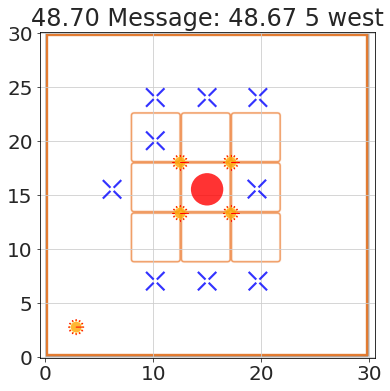

 1  0  0 
 0  2  0 
 0  0  0 



In [93]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)

robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

place_pieces(env)


x=[10.2,15,19.7,10.2,15,19.7,10.2,15,19.7,]
y=[20,20,20,15.5,15.5,15.5,11,11,11]
    
for i in range(9):
    if state[i]==1:
        pieceX(env,x[i],y[i])
    elif state[i]==2:
        pieceO(env,x[i],y[i])
    else:
        pass



run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=1,  # make this larger for a faster display
       )


print(robot.state)

In [92]:
state=update_state(robot.state,1,robot.move)
show_state(state)

status=win_status(state,1)
if status=='win':
    print("The robot won")
elif status=='lose':
    print("The robot lost")    
elif status=='stalemate':
    print("stalemate")
else:
    pass
    
# human move

if not status:

    move=human_move(state,2)
    state=update_state(state,2,move)

    status=win_status(state,1)
    if status=='win':
        print("The human won")
    elif status=='lose':
        print("The human lost")    
    elif status=='stalemate':
        print("stalemate")
    else:
        pass

    show_state(state)    

 1  0  0 
 0  0  0 
 0  0  0 

 0  1  2 
 3  4  5 
 6  7  8 

Player 2


which square to move? 4


 1  0  0 
 0  2  0 
 0  0  0 

